# Maven Music- Final Course Project

## 1. Scope the Project

The plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

In [97]:
# Read in the customer data
import pandas as pd

df_cus=pd.read_csv('maven_music_customers.csv')
df_cus.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [98]:
# Collect basic info about the data
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [99]:
# Return number of rows and columns
df_cus.shape

(30, 8)

In [100]:
# Read in the listening history
df_lishis=pd.read_excel('maven_music_listening_history.xlsx')
df_lishis.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [101]:
# Return number of rows and columns of listening history table
df_lishis.shape

(505, 5)

In [102]:
# Read in the audio data
df_audio=pd.read_excel('maven_music_listening_history.xlsx',sheet_name=1)
df_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [103]:
# Read in the session data
df_session=pd.read_excel('maven_music_listening_history.xlsx',sheet_name=2)
df_session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [104]:
# Check the data types
df_cus.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [105]:
# Convert objects to numeric and datetime fields
df_cus['Member Since']=pd.to_datetime(df_cus['Member Since'])
df_cus['Cancellation Date']=pd.to_datetime(df_cus['Cancellation Date'])                                
df_cus.head()


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),$2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,$2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,$2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),$2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,$2.99,NaN,NaT


In [106]:
# Replace $ sign and convert the datatype of the column from object to numeric
df_cus['Subscription Rate']=df_cus['Subscription Rate'].str.replace('$','',regex=False)
df_cus.head()
df_cus['Subscription Rate']=pd.to_numeric(df_cus['Subscription Rate'])

In [107]:
df_cus.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [108]:
# Look for NaN values in the data
df_cus.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [109]:
# Look all the rows with missing values 
df_cus[df_cus.isna().any(axis=1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [110]:
# check for rows with NaN values in the 'Subscription Plan' column
df_cus[df_cus['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [111]:
# Fill the missing values in the 'Subscription Plan' column with 'Basic (Ads)'
df_cus['Subscription Plan']=df_cus['Subscription Plan'].fillna('Basic (Ads)')
df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [112]:
# Replace NaN in Discount column to '0' and Yes to '1'
import numpy as np
df_cus['Discount?']=np.where(df_cus['Discount?'] == 'Yes',1,0)
df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT


#### ii. Inconsistent Text & Typos

In [113]:
# Look for inconsistent text & typos
df_cus['Subscription Rate'].value_counts()

2.99     17
7.99      7
9.99      5
99.99     1
Name: Subscription Rate, dtype: int64

In [114]:
# Max subscription rate is 99.99 which is likely found to be a typo
df_cus.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [115]:
# Replace 99.99 with 9.99
df_cus.iloc[15,5] = 9.99
df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT


In [116]:
df_cus['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [117]:
df_lishis.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [118]:
# Check listening history table
df_lishis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [119]:
# 'Audio type' is a categorical column so value_counts()
df_lishis['Audio Type'].value_counts()

Song       463
Podcast     42
Name: Audio Type, dtype: int64

In [120]:
# Check audio table
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [121]:
df_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [122]:
# Genre column is a categorical column.
df_audio.Genre.value_counts()

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [123]:
#'Pop Music' and 'Pop' are both same so replace 'Pop' by 'Pop Music'
import numpy as np
df_audio['Genre']=np.where(df_audio['Genre'] == 'Pop', 'Pop Music', df_audio['Genre'])
df_audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop Music,1
1,Song-102,Unbreakable Beat,Pop Music,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [124]:
# Check session table
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [125]:
# look for log in time
df_session['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

#### iii. Duplicate Rows

In [126]:
# Look for duplicate rows
df_cus[df_cus.duplicated()] # no duplicate rows in table df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [127]:
df_lishis.duplicated().sum() # no duplicate rows in table df_lishis

0

In [128]:
df_audio.duplicated().sum() # no duplicate rows in table df_audio

0

In [129]:
df_session.duplicated().sum() # no duplicate rows in table df_session

0

#### iv. Outliers

In [130]:
# Look for outliers
df_cus.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [131]:
df_lishis.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [132]:
df_audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [133]:
df_session.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [134]:
# Create a 'Cancelled' column
df_cus.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [135]:
df_cus['Cancellation status']=np.where(pd.isna(df_cus['Cancellation Date']),0,1)
df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancellation status
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [136]:
# Create an updated 'Email' column without the Email: portion
df_cus['Email']=df_cus['Email'].str.replace('Email:','')
df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancellation status
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


## 4. Exploratory Data Analysis

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [137]:
# How long were customers members before they cancelled?
df_cus['Cancellation Date']-df_cus['Member Since']

0        NaT
1        NaT
2    80 days
3        NaT
4        NaT
5    75 days
6        NaT
7    72 days
8        NaT
9        NaT
10       NaT
11       NaT
12   65 days
13   61 days
14       NaT
15   57 days
16       NaT
17       NaT
18       NaT
19   46 days
20       NaT
21       NaT
22   32 days
23   32 days
24       NaT
25   24 days
26   24 days
27       NaT
28   18 days
29   16 days
dtype: timedelta64[ns]

In [138]:
(df_cus['Cancellation Date']-df_cus['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [139]:
df_cus[(df_cus['Discount?'] == 1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancellation status
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [140]:
discounted=df_cus[(df_cus['Discount?'] == 1)]['Discount?'].sum()

In [141]:
cancelled=df_cus[(df_cus['Discount?'] == 1)]['Cancellation status'].sum()

In [142]:
# Cancellation rate for those who had a discount
CR_discounted=(cancelled/discounted)*100
CR_discounted

85.71428571428571

In [143]:
# Not given discount
df_cus[(df_cus['Discount?'] == 0)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancellation status
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [144]:
No_discount= df_cus[(df_cus['Discount?'] == 0)]['Discount?'].count()
No_discount

23

In [145]:
cancelled_no_discount=df_cus[(df_cus['Discount?'] == 0)]['Cancellation status'].sum()
cancelled_no_discount

7

In [146]:
# Cancellation rate for those who did not have a discount
CR_notdiscounted=(cancelled_no_discount/No_discount)*100
CR_notdiscounted

30.434782608695656

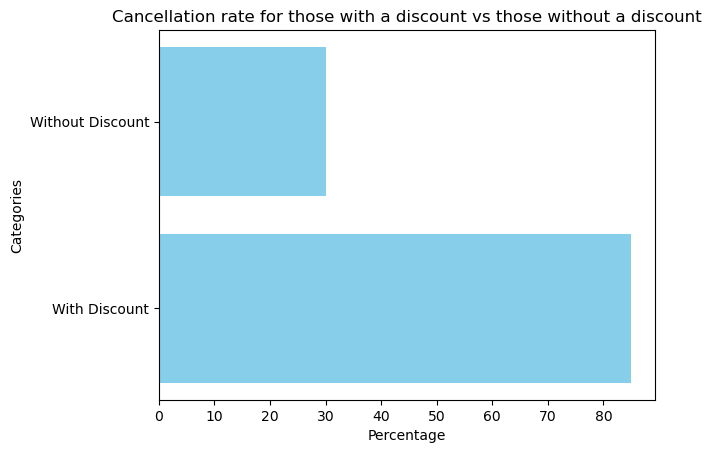

In [147]:
# Visualize the cancellation rate for those with a discount vs those without a discount
import matplotlib.pyplot as plt

# Sample data
Categories = ['With Discount', 'Without Discount']
Percentage = [85, 30]

# Create a horizontal bar plot
plt.barh(Categories, Percentage, color='skyblue')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Categories')
plt.title('Cancellation rate for those with a discount vs those without a discount')

# Show the plot
plt.show()


Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [148]:
df_lishis

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song
...,...,...,...,...,...
500,7579,111282,4,111,Song
501,6588,111286,1,201,Podcast
502,5763,111333,1,110,Song
503,5763,111333,2,108,Song


In [149]:
df_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop Music,1
1,Song-102,Unbreakable Beat,Pop Music,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [150]:
# Split the ID in the audio data so the column can be joined with other tables
# Split the number from audio id
df_audio['Modified_ID'] = np.where(df_audio['ID'].str.contains('Song'), df_audio['ID'].str[5:], df_audio['ID'].str[8:])
df_audio['Modified_ID']=pd.to_numeric(df_audio['Modified_ID'])
df_audio['Modified_ID']

0     101
1     102
2     103
3     104
4     105
5     106
6     107
7     108
8     109
9     110
10    111
11    112
12    201
13    202
14    203
15    204
16    205
Name: Modified_ID, dtype: int64

In [151]:
df_audio

,ID,Name,Genre,Popularity,Modified_ID
0,Song-101,Dance All Night,Pop Music,1,101
1,Song-102,Unbreakable Beat,Pop Music,2,102
2,Song-103,Sunset Boulevard,Pop Music,5,103
3,Song-104,Glowing Hearts,Pop Music,10,104
4,Song-105,Pop Rocks,Pop Music,52,105
5,Song-106,My Old Dog and My True Love,Country,23,106
6,Song-107,Dirt Road Romance,Country,30,107
7,Song-108,Chase the Dream,Hip Hop,4,108
8,Song-109,Rise Above,Hip Hop,9,109
9,Song-110,Boss Moves,Hip Hop,28,110


In [152]:
# Hint: Check the data type of Audio ID in the audio table
df_lishis['Audio ID'].dtype

dtype('int64')

In [153]:
df_audio.dtypes

ID             object
Name           object
Genre          object
Popularity      int64
Modified_ID     int64
dtype: object

In [154]:
# Merge the listening history table and audio table
df_lisaudio=df_lishis.merge(df_audio, how ='left', left_on='Audio ID', right_on= 'Modified_ID')
df_lisaudio

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Modified_ID
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop Music,1,101
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop Music,2,102
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5,103
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10,104
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52,105
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song-111,Moonlit Serenade,Jazz,63,111
501,6588,111286,1,201,Podcast,Podcast-201,Jokes on Jokes,Comedy,2,201
502,5763,111333,1,110,Song,Song-110,Boss Moves,Hip Hop,28,110
503,5763,111333,2,108,Song,Song-108,Chase the Dream,Hip Hop,4,108


<Axes: ylabel='Frequency'>

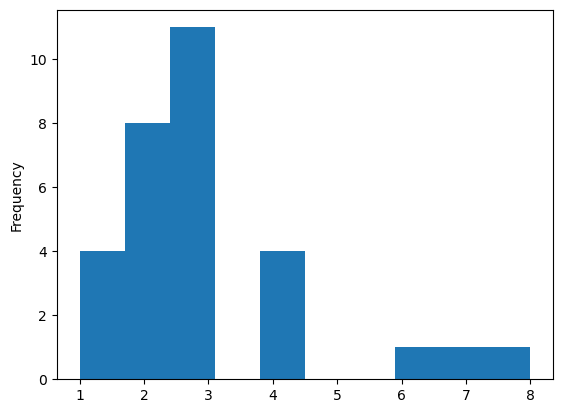

In [155]:
df_lisaudio.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [156]:
df_session.head()


,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [157]:
# Merge the listening history table with audio details to the session table
df_lisaudses=df_lisaudio.merge(df_session, how='left', on='Session ID')
df_lisaudses

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Modified_ID,Session Log In Time
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop Music,1,101,2023-03-13 18:29:00
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop Music,2,102,2023-03-13 18:29:00
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5,103,2023-03-13 18:29:00
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10,104,2023-03-13 18:29:00
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52,105,2023-03-13 18:29:00
...,...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song-111,Moonlit Serenade,Jazz,63,111,2023-05-23 23:51:00
501,6588,111286,1,201,Podcast,Podcast-201,Jokes on Jokes,Comedy,2,201,2023-05-27 02:15:00
502,5763,111333,1,110,Song,Song-110,Boss Moves,Hip Hop,28,110,2023-05-27 20:46:00
503,5763,111333,2,108,Song,Song-108,Chase the Dream,Hip Hop,4,108,2023-05-27 20:46:00


In [158]:
# The number of listening sessions that each customer had in the past 3 months


In [159]:
df_lisaudses.dtypes

Customer ID                     int64
Session ID                      int64
Audio Order                     int64
Audio ID                        int64
Audio Type                     object
ID                             object
Name                           object
Genre                          object
Popularity                      int64
Modified_ID                     int64
Session Log In Time    datetime64[ns]
dtype: object

In [160]:
df_lisaudses['Session Log In Time'].dt.month.value_counts()

5    254
3    145
4    106
Name: Session Log In Time, dtype: int64

In [161]:
no_ses=(df_lisaudses.groupby('Customer ID')['Session ID']
             .nunique()
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={'Session ID': 'No of Sessions'})
             .reset_index())
no_ses

,Customer ID,No of Sessions
0,5001,8
1,5267,7
2,5763,6
3,6824,4
4,5338,4
5,5002,4
6,7224,4
7,7158,3
8,7087,3
9,6406,3


In [162]:
# The most popular genres that customers listened to


In [163]:
df_lisaudses['Genre'].value_counts()

Pop Music     267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

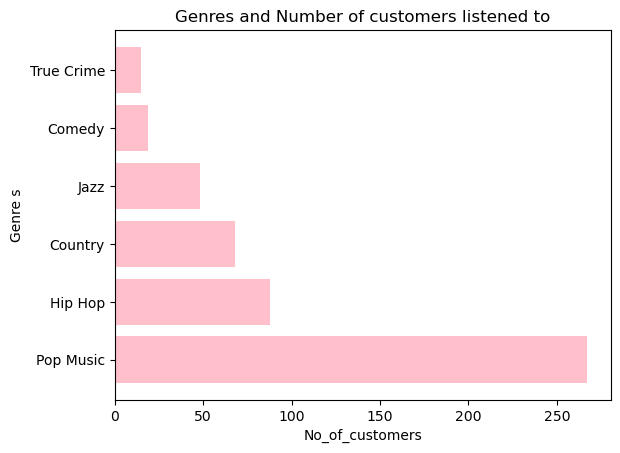

In [164]:
# Visualize the Genres customers listened to
import matplotlib.pyplot as plt

# Sample data
Genre = ['Pop Music', 'Hip Hop', 'Country','Jazz','Comedy','True Crime']
No_of_customers = [267, 88, 68, 48, 19, 15]

# Create a horizontal bar plot
plt.barh(Genre, No_of_customers, color='pink')

# Add labels and title
plt.xlabel('No_of_customers')
plt.ylabel('Genre s')
plt.title('Genres and Number of customers listened to')

# Show the plot
plt.show()


## 5. Prep for Modeling

A DataFrame to be created that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [165]:
# Create a dataframe ready for modeling
df_lisaudses.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Modified_ID,Session Log In Time
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop Music,1,101,2023-03-13 18:29:00
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop Music,2,102,2023-03-13 18:29:00
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5,103,2023-03-13 18:29:00
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10,104,2023-03-13 18:29:00
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52,105,2023-03-13 18:29:00


In [166]:
df_lisaudses.shape

(505, 11)

In [167]:
df_cus

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancellation status
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [168]:
df=df_lisaudses.merge(df_cus, how='left', on= 'Customer ID')
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity,Modified_ID,Session Log In Time,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancellation status
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop Music,1,101,2023-03-13 18:29:00,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop Music,2,102,2023-03-13 18:29:00,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5,103,2023-03-13 18:29:00,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10,104,2023-03-13 18:29:00,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52,105,2023-03-13 18:29:00,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [187]:
df_model=df_cus[['Customer ID','Cancellation status','Discount?']]
df_model.head()

,Customer ID,Cancellation status,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [188]:
# Calculate the number of listening sessions for each customer
dfmodel= df_model.merge(no_ses, how='left', on= 'Customer ID')
dfmodel.head()

,Customer ID,Cancellation status,Discount?,No of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [189]:
# Percent pop
dummies=pd.get_dummies(df['Genre'])
dummies.head()

,Comedy,Country,Hip Hop,Jazz,Pop Music,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [172]:
df_music=(pd.concat([df['Customer ID'],dummies],axis=1)
   .groupby('Customer ID')
   .sum()
   .reset_index())
df_music.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop Music,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [173]:
df_music['Total_audio']=(df_music[['Comedy', 'Country','Hip Hop','Jazz','Pop Music','True Crime']].sum(axis=1))                                                                              
df_music.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop Music,True Crime,Total_audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [175]:
df_music['Percent_Pop']=round((df_music['Pop Music']/df_music['Total_audio'])*100)
df_music.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop Music,True Crime,Total_audio,Percent_Pop
0,5001,0,0,26,0,34,0,60,57.0
1,5002,0,22,0,0,0,0,22,0.0
2,5004,0,0,0,0,9,0,9,100.0
3,5267,0,0,22,0,23,0,45,51.0
4,5338,0,18,0,0,0,0,18,0.0


In [176]:
model_frame=pd.concat([dfmodel,df_music['Percent_Pop']],axis=1)

In [178]:
# Percent podcasts
filt_df=df_audio[df_audio['ID'].str.contains('Podcast')]
filt_df

,ID,Name,Genre,Popularity,Modified_ID
12,Podcast-201,Jokes on Jokes,Comedy,2,201
13,Podcast-202,Laugh Out Loudcast,Comedy,8,202
14,Podcast-203,The Comedian's Corner,Comedy,20,203
15,Podcast-204,Crime Chronicles,True Crime,4,204
16,Podcast-205,Investigating Darkness,True Crime,17,205


In [179]:
df_audio['Genre'].value_counts()

Pop Music     5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [190]:
df_music['Percent_Podcast']=round(((df_music['True Crime']+df_music['Comedy'])/(df_music['Total_audio']))*100,2)
df_music.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop Music,True Crime,Total_audio,Percent_Pop,Percent_Podcast
0,5001,0,0,26,0,34,0,60,57.0,0.0
1,5002,0,22,0,0,0,0,22,0.0,0.0
2,5004,0,0,0,0,9,0,9,100.0,0.0
3,5267,0,0,22,0,23,0,45,51.0,0.0
4,5338,0,18,0,0,0,0,18,0.0,0.0


In [183]:
final_model=pd.concat([dfmodel,df_music['Percent_Pop'],df_music['Percent_Podcast']],axis=1)

In [184]:
final_model

,Customer ID,Cancellation status,Discount?,No of Sessions,Percent_Pop,Percent_Podcast
0,5001,0,0,8,57.0,0.00
1,5002,0,0,4,0.0,0.00
2,5004,1,0,1,100.0,0.00
3,5267,0,0,7,51.0,0.00
4,5338,0,0,4,0.0,0.00
5,5404,1,0,1,100.0,0.00
6,5581,0,0,3,0.0,100.00
7,5759,1,0,2,100.0,0.00
8,5761,0,0,3,0.0,100.00
9,5763,0,0,6,65.0,0.00


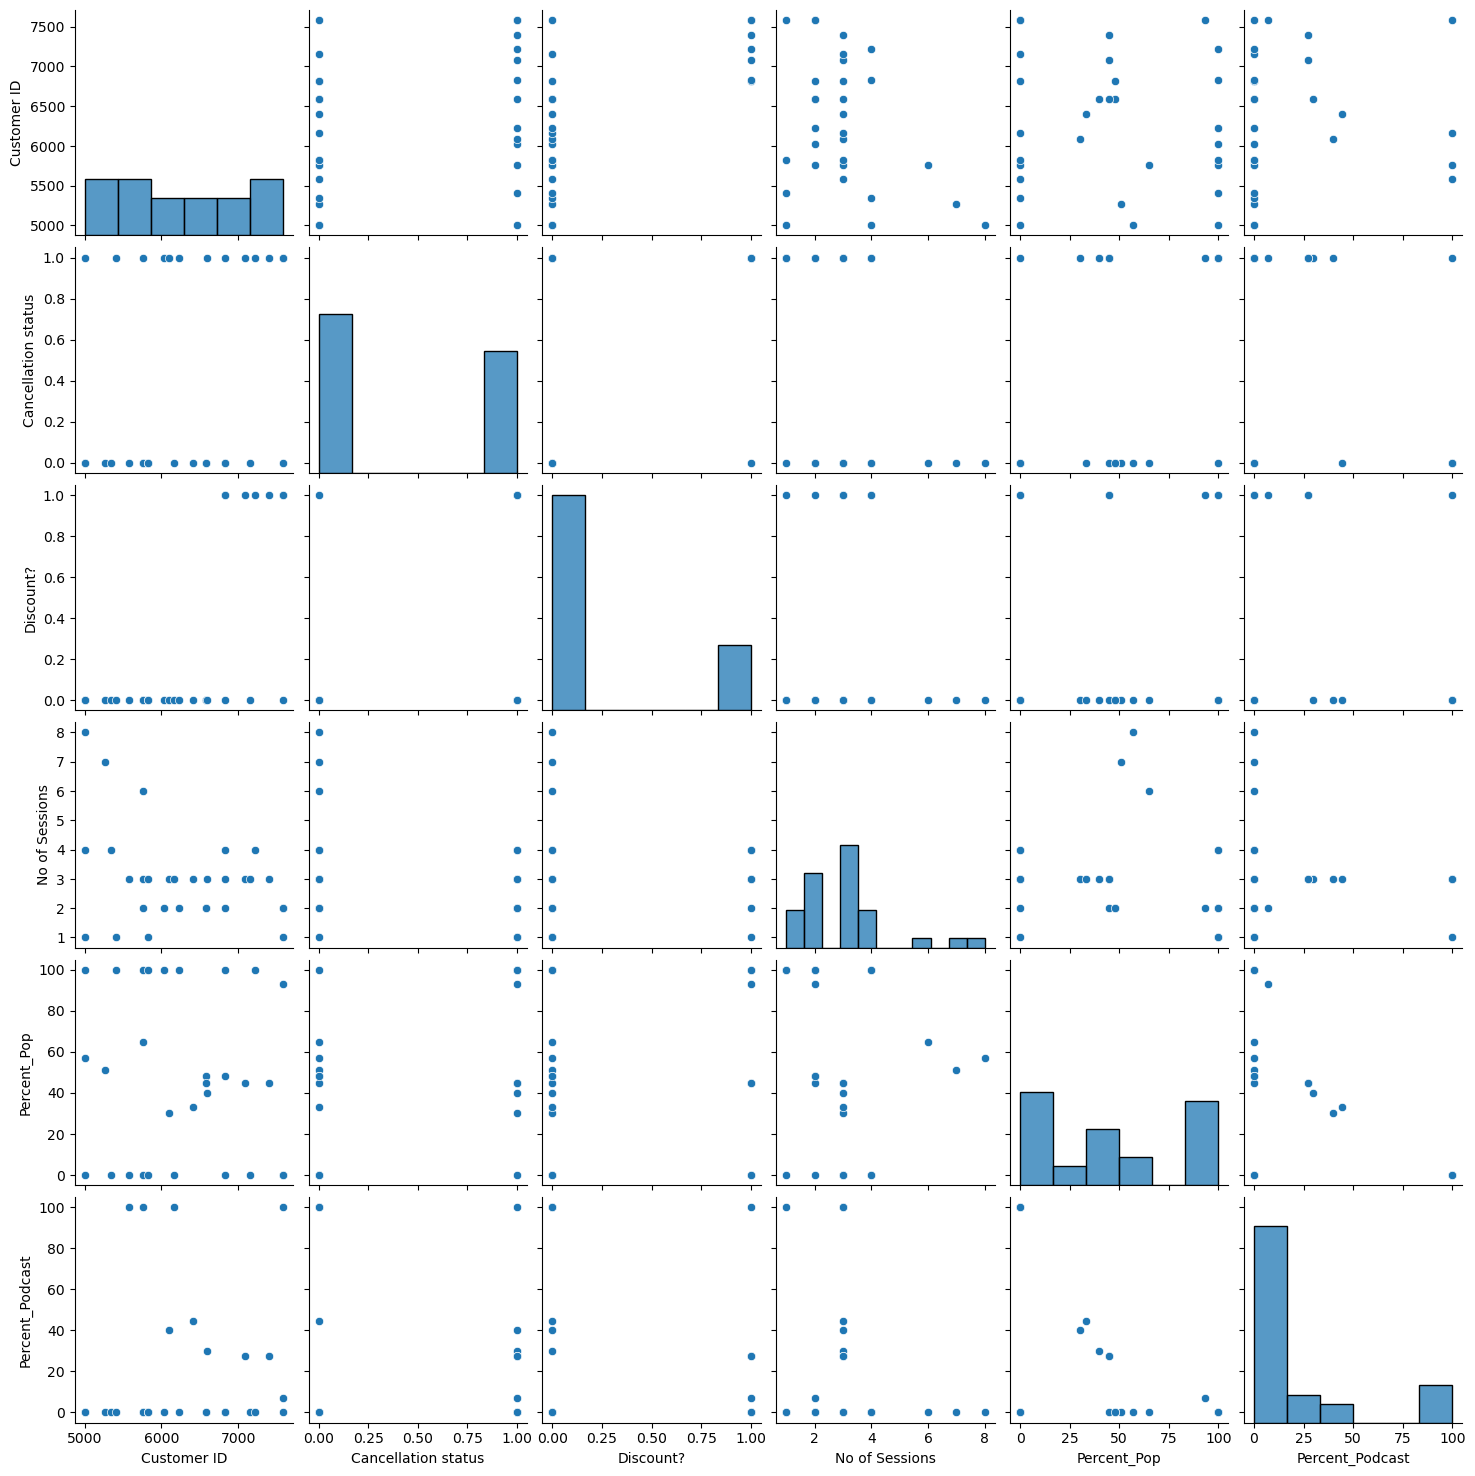

In [185]:
import seaborn as sns
sns.pairplot(final_model)

In [186]:
final_model.corr()

,Customer ID,Cancellation status,Discount?,No of Sessions,Percent_Pop,Percent_Podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.077422,0.083072
Cancellation status,0.269942,1.000000,0.471825,-0.333739,0.584480,-0.035419
Discount?,0.648514,0.471825,1.000000,-0.048877,0.111384,0.062925
No of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.129659,-0.125458
Percent_Pop,-0.077422,0.584480,0.111384,-0.129659,1.000000,-0.487597
Percent_Podcast,0.083072,-0.035419,0.062925,-0.125458,-0.487597,1.000000


In [ ]:
# Observations
# Cancellation and Discount are positively correlated
# No. of listening sessions is negatively correlated to cancellation- higher listening session -lesser cancellation
# Percent of Pop is positively related to cancellation
# Percent of Podcast not correlated to Cancellation